NOMBRES ETC

- Explicitar tipo de problema (clasificación / regresión)
- Definición, justificación de uso de métricas para medir el desempeño

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

# FEATURE ENGINE
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer
#from feature_engine.encoding import OrdinalEncoder

# SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score, cross_validate

# FACTOR ANALYZER
from factor_analyzer import FactorAnalyzer

# OTROS
import helpers as hp
from IPython.display import HTML 


### Binarias
- `school`: Escuela del estudiante. (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira).
- `sex`: Sexo del estudiante. (binaria: 'F' - Mujer o 'M' - Hombre).
- `address`: Ubicación de la casa del estudiante. (binaria: 'U' - urbana o 'R' - rural).
- `famsize`: Tamaño de la familia. (binaria: 'LE3' - less or equal to 3 or 'GT3' - greater than 3).
- `Pstatus`: Estado cohabitacional de los padres. (binaria: 'T' - cohabitando juntos o 'A' - viviendo separados).
- `schoolsup`: Apoyo educacional del colegio. (binaria: si o no).
- `famsup`: Apoyo educacional familiar. (binaria: si o no).
- `paid`: Clases particulares pagadas (matemáticas o portugués) (binaria: sí o no).
- `activities`: Actividades extracurriculares. (binaria: si o no).
- `nursery`: Asistió a guardería infantil. (binaria: si o no).
- `higher`: Desea proseguir estudios superiores (binaria: si o no).
- `internet`: Acceso a internet desde el hogar (binaria: si o no).
- `romantic`: Relación romántica (binaria: si o no).

### Categóricas (Nominales)
- `Mjob`: Ocupación de la madre. (nominal: 'teacher' profesora, 'health' relacionada a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- `Fjob`: Ocupación del padre (nominal: 'teacher' profesor, 'health' relacionado a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- `reason`: Razón para escoger la escuela (nominal: 'home' cercano a casa, 'reputation' reputación de la escuela, 'course' preferencia de cursos u 'other' otra).
- `guardian`: Apoderado del estudiante (nominal: 'mother' madre, 'father' padre u 'other' otro).

### Numéricas
- `age`: Edad del estudiante. (numérica: de 15 a 22).
- `Medu`: Nivel educacional de la madre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- `Fedu`: Nivel educacional del padre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- `failures`: Número de clases reprobadas. (numérica: n si 1<=n<3, de lo contrario 4).
- `famrel`: Calidad de las relaciones familiares. (numérica: de 1 - muy malas a 5 - excelentes).
- `freetime`: Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho).
- `goout`: Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas).
- `Dalc`: Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto).
- `Walc`: Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto).
- `health`: Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno).
- `absences`: Cantidad de ausencias escolares (numérica: de 0 a 93).
- `traveltime`: Tiempo de viaje entre hogar y colegio. Se debe codificar como:
	* 1 si es menos de 15 min,
	* 2 si es de 15 a 30 min,
	* 3 si es de 30 min. a 1 hora,
	* 4 - si es más de 1 hora).
- `studytime`: Horas semanales dedicadas al estudio. Se debe codificar como:
	* 1 si es menos de 2 horas,
	* 2 si es de 2 a 5 horas,
	* 3 si es de 5 a 10 horas,
	* 4 si es más de 10 horas.

### Target (Numérico)
- `G1`: Notas durante el primer semestre (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo.
- `G2`: Notas durante el segundo semestre (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo.
- `G3`: Promedio final (numérica: de 0 a 20). Este es uno de sus vectores objetivos para el modelo descriptivo y el vector a predecir en el modelo predictivo.

### Resolución de aspectos adicionales a considerar:
### Parte 1: 
 - Importar correctamente la data con separador indicado
 - Recodificación de valores nulos
 - Reasignación y limpieza de 3 variables númericas ingresadas como string("age", "goout", "health)
 - No esta indicado, pero se imputa los nulos en variables categóricas por moda y para variables númericas por la media.

In [3]:
def load_students():
        df = pd.read_csv('students.csv',sep='|',index_col = 'Unnamed: 0', na_values=['nulidade', 'sem validade', 'zero'])
        df.age=df.age.str.replace('"','')
        df.goout=df.goout.str.replace('"','')
        df.health=df.health.str.replace('"','')
        #df.astype({'age': 'float', 'goout':'float','health':'float'})
        df.age = pd.to_numeric(df.age, errors='coerce')
        df.goout = pd.to_numeric(df.goout, errors='coerce')
        df.health = pd.to_numeric(df.health, errors='coerce')
        return df

In [4]:
df = load_students()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5,6.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,NaN,8,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14,15.0
4,GP,F,NaN,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2.0,2.0,services,services,...,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9,9.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,...,2.0,4.0,5.0,3.0,4.0,2.0,3.0,14.0,16,16.0
392,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,...,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8,7.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,...,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,12,10.0


In [5]:
hp.describe_variables(df)

------------------------------------------------------------
-------------------Variables Categóricas--------------------
------------------------------------------------------------


,GP,MS
school,345,45


,F,M
sex,206,186


,U,R
address,305,88


,GT3,LE3
famsize,278,113


,T,A
Pstatus,349,40


,other,services,at_home,teacher,health
Mjob,138,102,59,57,33


,other,services,teacher,at_home,health
Fjob,217,111,29,20,18


,course,home,reputation,other
reason,144,108,103,36


,mother,father,other
guardian,270,89,32


,no,yes
schoolsup,337,50


,yes,no
famsup,239,151


,no,yes
paid,214,180


,yes,no
activities,199,191


,yes,no
nursery,309,80


,yes,no
higher,369,20


,yes,no
internet,327,65


,no,yes
romantic,262,131


------------------------------------------------------------
-------------------Variables Numéricas----------------------
------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
age,391.0,16.7,1.3,15.0,16.0,17.0,18.0,22.0
Medu,392.0,2.7,1.1,0.0,2.0,3.0,4.0,4.0
Fedu,390.0,2.5,1.1,0.0,2.0,2.5,3.0,4.0
traveltime,392.0,1.5,0.7,1.0,1.0,1.0,2.0,4.0
studytime,390.0,2.0,0.8,1.0,1.0,2.0,2.0,4.0
failures,390.0,0.3,0.7,0.0,0.0,0.0,0.0,3.0
famrel,390.0,3.9,0.9,1.0,4.0,4.0,5.0,5.0
freetime,393.0,3.2,1.0,1.0,3.0,3.0,4.0,5.0
goout,390.0,3.1,1.1,1.0,2.0,3.0,4.0,5.0
Dalc,392.0,1.5,0.9,1.0,1.0,1.0,2.0,5.0


#### Modelo Explicativo:

In [6]:
# Definición de dataframes eliminando G1, G2 y G3 según corresponda
dfs = {}
dfs['G1'] = df.drop(["G2", "G3"], axis=1)
dfs['G2'] = df.drop(["G1", "G3"], axis=1)
dfs['G3'] = df.drop(["G1", "G2"], axis=1)


In [7]:
varremove = {}
varremove['G1'] = ["traveltime", "Pstatus", "age", "nursery", "famrel", "school", "Dalc", "activities", "absences", "Medu", "romantic", "internet", "guardian", "paid", "address", "reason", "Walc", "famsize", "health", "freetime", "Fedu"]
varremove['G2'] = ["absences","Fedu","nursery","activities","Dalc","Walc","famrel","paid","freetime","Pstatus","Mjob","school","health","age","guardian","traveltime","Fjob","higher","internet","famsize","famsup"]
varremove['G3'] = ["nursery", "absences", "Mjob", "health", "Fedu", "guardian", "paid", "traveltime", "Pstatus", "famrel", "age", "school", "address", "Walc", "Dalc", "freetime", "activities", "studytime", "internet", "famsup", "Fjob", "famsize", "higher", "schoolsup"]
variables = dfs['G1'].drop(columns='G1').columns.to_list()
dicc = {key:[(col in varremove[key]) for col in variables] for key in varremove.keys()}
test_df = pd.DataFrame(dicc,index = variables)
filtro = (~(test_df.all(axis='columns') | ~test_df.any(axis='columns')))
test_df[filtro]

,G1,G2,G3
address,True,False,True
Medu,True,False,False
Mjob,False,True,True
Fjob,False,True,True
reason,True,False,False
studytime,False,False,True
schoolsup,False,False,True
famsup,False,True,True
higher,False,True,True
romantic,True,False,False


Variables Sacadas en G1 que permanecen en G2, G3
- Medu

Variables Sacadas en G2 y G3 que no se sacaron en G1
- famsize
- Fedu
- Mjob
- Fjob
- guardian
- famsup
- paid
- higher
- internet
- freetime
- Walc
- health

Variables 
- studytime
- schoolsup
- address

In [8]:
dfs['G1_r'] = dfs["G1"].drop(columns=varremove["G1"])
dfs['G2_r'] = dfs["G2"].drop(columns=varremove["G2"])
dfs['G3_r'] = dfs["G3"].drop(columns=varremove["G3"])

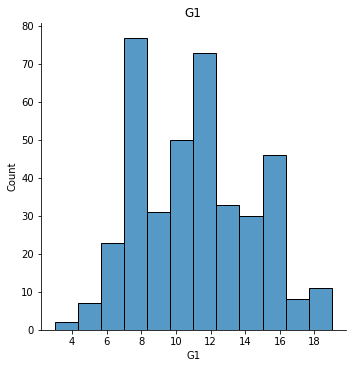

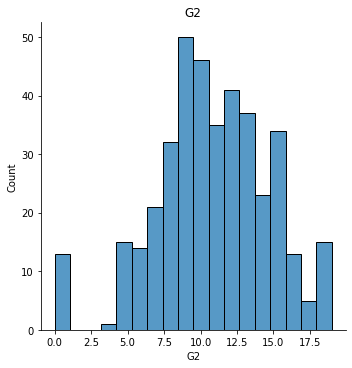

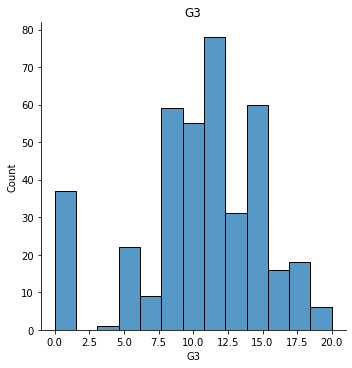

In [9]:
targets = list(dfs.keys())
df_t = {}
pipes = {}
X_f = {}
ys = {}
x1 = {}
models = {}
targetsname = {'G1_r': "G1",'G2_r': "G2", 'G3_r': "G3", "G1": "G1", "G2": "G2", "G3":"G3"}

for tname in targets:
    df_t[tname] = dfs[tname].dropna(axis=0, subset= [targetsname[tname]])
    x1[tname] = df_t[tname].drop(columns=[targetsname[tname]])
    ys[tname] = df_t[tname][targetsname[tname]]
    if tname in ['G1', 'G2', 'G3']:
        sns.displot(ys[tname])
        plt.title(tname)
        plt.show(f'Target: {targetsname[tname]}')
    


In [10]:
X_fa = {}
for tname in targets:
    
    # Grupos de variables    
    x1_cat = x1[tname].select_dtypes(np.object_).columns.to_list()                                                         # Categoricas
    x1_catbin = [col for col in x1[tname].select_dtypes(np.object_).columns.to_list() if len(x1[tname][col].value_counts()) == 2] # Categoricas binarias
    x1_catnum = [col for col in x1[tname].select_dtypes(np.object_).columns.to_list() if len(x1[tname][col].value_counts()) > 2]  # Categoricas numericas
    x1_num = x1[tname].select_dtypes(np.number).columns.to_list()                                                          # Numericas
    
    # Definición de pipelines
    pipes[tname] = Pipeline(steps = [
                    ("mmi" , MeanMedianImputer(imputation_method='median')),
                    ("ci" , CategoricalImputer(imputation_method='frequent')),
                    ('oe', SklearnTransformerWrapper(OrdinalEncoder(categories=hp.OrdinalEncoderListCategories(x1[tname][x1_catbin], direction='ascending', bin_or_num='bin') + hp.OrdinalEncoderListCategories(x1[tname][x1_catnum], direction='descending', bin_or_num='num') ),variables =  x1_catbin + x1_catnum)),
                    ("sc" , SklearnTransformerWrapper(StandardScaler(), variables= x1_num))
                    ])
    # Ajuste
    X_f[tname] = pipes[tname].fit_transform(x1[tname],ys[tname]) # Transformo data de acuerdo al pipeline
        
    # Modelo descriptivo
    X_fa[tname] = X_f[tname].copy()
    X_f[tname] = sm.add_constant(X_f[tname]) # Agrego una columna de 1's para el modelo de regresión lineal
    models[tname] = sm.OLS(ys[tname] ,X_f[tname]).fit() # Modelo de regresión lineal
    predsg1 = models[tname].predict(X_f[tname]) # Predicciones del modelo de regresión lineal

    # Prints
    display(HTML(f'<p style="padding:20px 30px; background:tomato;font-size:20px;color: white">Modelo exploratorio para {tname}</p>'))
    display(models[tname].summary())
    hp.evaluation(models[tname], ys[tname], predsg1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     4.563
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           8.84e-13
Time:                        14:58:48   Log-Likelihood:                -960.56
No. Observations:                 391   AIC:                             1983.
Df Residuals:                     360   BIC:                             2106.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7345      1.355      5.709      0.000       5.070      10.399
school         0.1110      0.555      0.200      0.842      -0.981       1.203
sex           -0.8052      0.355     -2.268      0.024      -1.503      -0.107
age            0.0036      0.190      0.019      0.985      -0.370       0.377
address        0.1980      0.411      0.482      0.630      -0.610       1.006
famsize       -0.4239      0.349     -1.214      0.225      -1.110       0.263
Pstatus        0.0175      0.520      0.034      0.973      -1.005       1.040
Medu           0.1134      0.217      0.523      0.601      -0.313       0.540
Fedu           0.2080      0.207      1.004      0.316      -0.199       0.616
Mjob           0.1896      0.129      1.471      0.142      -0.064       0.443
Fjob           0.3422      0.153      2.232      0.026       0.041       0.644
reason         0.1464      0.157      0.932      0.352      -0.163       0.455
guardian       0.1895      0.266      0.712      0.477      -0.334       0.713
traveltime     0.0012      0.168      0.007      0.994      -0.328       0.331
studytime      0.4623      0.170      2.718      0.007       0.128       0.797
failures      -0.8947      0.176     -5.096      0.000      -1.240      -0.549
schoolsup      1.9597      0.491      3.993      0.000       0.995       2.925
famsup        -0.7514      0.344     -2.186      0.029      -1.427      -0.075
paid           0.2271      0.338      0.672      0.502      -0.438       0.892
activities    -0.1657      0.316     -0.525      0.600      -0.786       0.455
nursery        0.0297      0.390      0.076      0.939      -0.737       0.796
higher         1.3256      0.755      1.757      0.080      -0.159       2.810
internet       0.2450      0.438      0.560      0.576      -0.616       1.106
romantic       0.2088      0.336      0.621      0.535      -0.452       0.870
famrel         0.0286      0.157      0.181      0.856      -0.281       0.338
freetime       0.2198      0.166      1.323      0.187      -0.107       0.547
goout         -0.3839      0.178     -2.156      0.032      -0.734      -0.034
Dalc          -0.0895      0.209     -0.429      0.668      -0.500       0.321
Walc          -0.1083      0.226     -0.480      0.631      -0.552       0.335
health        -0.1692      0.157     -1.079      0.281      -0.478       0.139
absences       0.0726      0.164      0.443      0.658      -0.250       0.395
==============================================================================
Omnibus:                        7.146   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                5.035
Skew:                           0.142   Prob(JB):                       0.0807
Kurtosis:                       2.522   Cond. No.                         35.4
==

AIC es : 1983.1165170486358
BIC es : 2106.146451408182
Condition Number: 35.39568019264527
R2: 0.2754912041698079
RMSE: 2.8228081990169898 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     4.319
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           7.01e-12
Time:                        14:58:48   Log-Likelihood:                -1023.1
No. Observations:                 395   AIC:                             2108.
Df Residuals:                     364   BIC:                             2232.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4205      1.544      5.455      0.000       5.385      11.456
school        -0.3763      0.634     -0.594      0.553      -1.623       0.870
sex           -0.8471      0.403     -2.101      0.036      -1.640      -0.054
age           -0.2425      0.216     -1.125      0.261      -0.666       0.181
address        0.5321      0.468      1.137      0.256      -0.389       1.453
famsize       -0.5710      0.395     -1.444      0.150      -1.349       0.207
Pstatus       -0.3784      0.593     -0.638      0.524      -1.545       0.788
Medu           0.2930      0.245      1.196      0.232      -0.189       0.775
Fedu           0.0485      0.236      0.205      0.837      -0.416       0.513
Mjob           0.0816      0.146      0.558      0.577      -0.206       0.369
Fjob           0.1927      0.174      1.106      0.269      -0.150       0.535
reason         0.2997      0.178      1.687      0.092      -0.050       0.649
guardian       0.3243      0.302      1.075      0.283      -0.269       0.918
traveltime    -0.2474      0.190     -1.299      0.195      -0.622       0.127
studytime      0.4249      0.193      2.199      0.029       0.045       0.805
failures      -0.9590      0.197     -4.864      0.000      -1.347      -0.571
schoolsup      1.3259      0.551      2.407      0.017       0.243       2.409
famsup        -0.7766      0.388     -2.003      0.046      -1.539      -0.014
paid          -0.1706      0.383     -0.445      0.657      -0.925       0.583
activities    -0.1186      0.359     -0.330      0.741      -0.824       0.587
nursery        0.0998      0.445      0.224      0.823      -0.775       0.974
higher         0.9856      0.860      1.145      0.253      -0.706       2.678
internet       0.7517      0.496      1.514      0.131      -0.224       1.728
romantic       0.8096      0.381      2.127      0.034       0.061       1.558
famrel        -0.0814      0.179     -0.455      0.649      -0.433       0.270
freetime       0.1321      0.189      0.700      0.484      -0.239       0.503
goout         -0.5457      0.202     -2.704      0.007      -0.942      -0.149
Dalc          -0.0834      0.237     -0.352      0.725      -0.549       0.383
Walc           0.1126      0.255      0.442      0.659      -0.389       0.614
health        -0.1652      0.178     -0.926      0.355      -0.516       0.186
absences       0.0256      0.186      0.138      0.891      -0.340       0.391
==============================================================================
Omnibus:                       18.125   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.406
Skew:                          -0.439   Prob(JB):                     2.25e-05
Kurtosis:                       3.729   Cond. No.                         35.5
==

AIC es : 2108.2812945795813
BIC es : 2231.626753291516
Condition Number: 35.502957984327296
R2: 0.26252371168372857
RMSE: 3.226154767519921 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     4.198
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.09e-11
Time:                        14:58:48   Log-Likelihood:                -1092.5
No. Observations:                 392   AIC:                             2247.
Df Residuals:                     361   BIC:                             2370.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6169      1.883      4.576      0.000       4.913      12.320
school        -1.0163      0.775     -1.311      0.191      -2.541       0.509
sex           -1.2151      0.493     -2.463      0.014      -2.185      -0.245
age           -0.3585      0.264     -1.360      0.175      -0.877       0.160
address        0.5861      0.573      1.023      0.307      -0.540       1.712
famsize       -0.6199      0.483     -1.283      0.200      -1.570       0.330
Pstatus       -0.4021      0.731     -0.550      0.583      -1.839       1.035
Medu           0.4406      0.296      1.487      0.138      -0.142       1.024
Fedu          -0.0649      0.286     -0.227      0.821      -0.628       0.498
Mjob           0.0489      0.178      0.274      0.784      -0.302       0.400
Fjob           0.3162      0.213      1.486      0.138      -0.102       0.735
reason         0.5130      0.218      2.352      0.019       0.084       0.942
guardian       0.1161      0.369      0.315      0.753      -0.609       0.841
traveltime    -0.1683      0.235     -0.717      0.474      -0.630       0.293
studytime      0.3959      0.235      1.681      0.094      -0.067       0.859
failures      -1.2042      0.242     -4.984      0.000      -1.679      -0.729
schoolsup      1.1741      0.671      1.749      0.081      -0.146       2.494
famsup        -0.7445      0.475     -1.566      0.118      -1.679       0.190
paid          -0.1878      0.468     -0.401      0.689      -1.109       0.733
activities    -0.4980      0.439     -1.136      0.257      -1.361       0.364
nursery       -0.0280      0.543     -0.052      0.959      -1.095       1.039
higher         1.5457      1.055      1.466      0.144      -0.528       3.620
internet       0.5001      0.607      0.825      0.410      -0.693       1.693
romantic       1.1509      0.465      2.476      0.014       0.237       2.065
famrel         0.1967      0.219      0.900      0.369      -0.233       0.627
freetime       0.2538      0.230      1.102      0.271      -0.199       0.707
goout         -0.6116      0.246     -2.488      0.013      -1.095      -0.128
Dalc          -0.3680      0.293     -1.256      0.210      -0.944       0.208
Walc           0.3631      0.312      1.163      0.245      -0.251       0.977
health        -0.0569      0.218     -0.261      0.794      -0.486       0.372
absences       0.3952      0.227      1.741      0.083      -0.051       0.842
==============================================================================
Omnibus:                       21.592   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.615
Skew:                          -0.588   Prob(JB):                     7.45e-06
Kurtosis:                       3.255   Cond. No.                         35.4
==

AIC es : 2247.087930403155
BIC es : 2370.1970474366594
Condition Number: 35.44866838528553
R2: 0.25864292957609425
RMSE: 3.9281297374932365 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     14.14
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.01e-19
Time:                        14:58:48   Log-Likelihood:                -967.21
No. Observations:                 391   AIC:                             1954.
Df Residuals:                     381   BIC:                             1994.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0697      0.852      9.471      0.000       6.394       9.745
sex           -0.8486      0.316     -2.683      0.008      -1.471      -0.227
Mjob           0.2350      0.116      2.024      0.044       0.007       0.463
Fjob           0.4168      0.140      2.970      0.003       0.141       0.693
studytime      0.4504      0.159      2.841      0.005       0.139       0.762
failures      -0.9644      0.158     -6.089      0.000      -1.276      -0.653
schoolsup      1.9607      0.462      4.242      0.000       1.052       2.869
famsup        -0.6807      0.316     -2.153      0.032      -1.302      -0.059
higher         1.4568      0.714      2.040      0.042       0.053       2.861
goout         -0.3632      0.149     -2.436      0.015      -0.656      -0.070
==============================================================================
Omnibus:                        7.339   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                5.681
Skew:                           0.190   Prob(JB):                       0.0584
Kurtosis:                       2.549   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC es : 1954.4247124435071
BIC es : 1994.1117880433608
Condition Number: 18.729318227841482
R2: 0.25040713865198305
RMSE: 2.8712582760078216 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     12.23
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.69e-17
Time:                        14:58:49   Log-Likelihood:                -1033.6
No. Observations:                 395   AIC:                             2087.
Df Residuals:                     385   BIC:                             2127.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3765      0.735     11.394      0.000       6.931       9.822
sex           -0.9213      0.364     -2.532      0.012      -1.637      -0.206
address        0.9954      0.413      2.412      0.016       0.184       1.807
Medu           0.4250      0.178      2.387      0.017       0.075       0.775
reason         0.3530      0.171      2.059      0.040       0.016       0.690
studytime      0.4196      0.181      2.323      0.021       0.064       0.775
failures      -1.0396      0.179     -5.794      0.000      -1.392      -0.687
schoolsup      1.3102      0.518      2.531      0.012       0.292       2.328
romantic       0.7927      0.367      2.162      0.031       0.072       1.514
goout         -0.5360      0.172     -3.116      0.002      -0.874      -0.198
==============================================================================
Omnibus:                       20.303   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.500
Skew:                          -0.468   Prob(JB):                     4.79e-06
Kurtosis:                       3.782   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC es : 2087.259950305883
BIC es : 2127.0488079548945
Condition Number: 11.150842900068293
R2: 0.22229719141947168
RMSE: 3.312973796593406 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     16.04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.73e-16
Time:                        14:58:49   Log-Likelihood:                -1107.5
No. Observations:                 392   AIC:                             2229.
Df Residuals:                     385   BIC:                             2257.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7831      0.497     19.673      0.000       8.805      10.761
sex           -1.0908      0.423     -2.581      0.010      -1.922      -0.260
Medu           0.5696      0.217      2.626      0.009       0.143       0.996
reason         0.5489      0.211      2.597      0.010       0.133       0.964
failures      -1.4209      0.217     -6.535      0.000      -1.848      -0.993
romantic       0.9908      0.447      2.216      0.027       0.112       1.870
goout         -0.5219      0.211     -2.475      0.014      -0.936      -0.107
==============================================================================
Omnibus:                       27.904   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.824
Skew:                          -0.662   Prob(JB):                     1.23e-07
Kurtosis:                       3.439   Cond. No.                         5.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC es : 2228.923584413904
BIC es : 2256.722417292437
Condition Number: 5.701570801010645
R2: 0.200014383670012
RMSE: 4.080498245586002 


p_value: 4.473641993872694e-67. Tiene que ser menor que un nivel de significancia 0.05, OK para poder usar factor analyzer
El valor de kmo es 0.5790022678021868. Si kmo_model es menor a 0.6 el factor analyzer no se puede hacer... 0.7 dice la lectura 


,KMO_ALL
famrel,0.503727
freetime,0.605971
goout,0.628582
Dalc,0.584843
Walc,0.554989
health,0.550622


(6,)


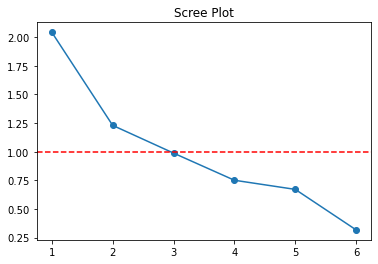

,0
Walc,0.998114
Dalc,0.650830
goout,0.414118
freetime,0.196431
health,0.085827
famrel,-0.113069


,1
freetime,0.612205
famrel,0.322798
goout,0.294414
health,0.132425
Dalc,0.089088
Walc,-0.059839


In [26]:
tname = 'G1'
X_FA_copy = X_fa[tname].loc[:, "famrel":"health"]
hp.test_factor_analyzer(X_FA_copy) 
fa = FactorAnalyzer()
fa.fit(X_FA_copy)
ev, v = fa.get_eigenvalues() 
print(ev.shape)
plt.plot(range(1,ev.shape[0]+1), ev, "-o")
plt.axhline(y=1,c="red",ls="--")
plt.title("Scree Plot")
plt.show();
## Reducción de dimensionalidad ... 3 variables nuevas
n_factors_calculated = ((ev>1)*1).sum()
fa2 = FactorAnalyzer(n_factors=n_factors_calculated, rotation='varimax')
fa2.fit(X_FA_copy)
loads = pd.DataFrame(fa2.loadings_, index=X_FA_copy.columns)
for i in range(0,n_factors_calculated):
    display(pd.DataFrame({f'{i}': loads.sort_values(by=i, ascending=False)[i]}))
    # display(pd.DataFrame({'1': loads.sort_values(by=1, ascending=False)[1]}))

1er grupo: Consumo de alcohol semana y fin de semana variables con factor (0.99811 y 0.64083)  
2do grupo: calidad de relaciones familiares y tiempo libre.

#### Modelo Predictivo  (G3)

In [ ]:
#Modelo usando todas las variables (menos G1 y G2):

cvs   = {}
scorings = {"r2":"r2", "neg_root_mean_squared_error": "neg_root_mean_squared_error"}
metrics = scorings.keys()

for tname in X_f.keys():

    X_train, X_test, y_train, y_test = train_test_split (X_f[tname], ys[tname], test_size=0.2, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train,y_train)

    y_pred = lr.predict(X_test)
    cv = KFold(n_splits=2, random_state=42, shuffle=True) #LeaveOneOut()
    cvs[tname] = cross_validate(lr, X_f[tname], ys[tname], cv=cv, scoring = scorings)

    
    print(f"\nModelo {tname}: ")
    print("R2:", r2_score (y_test,y_pred))
    print("RMSE:", mean_squared_error(y_test,y_pred,squared=False))


Modelo G1: 
R2: 0.21782856553842733
RMSE: 3.14649057238124

Modelo G2: 
R2: 0.21596685924634706
RMSE: 3.341242024651787

Modelo G3: 
R2: 0.03775471315120604
RMSE: 4.547224395899578

Modelo G1_r: 
R2: 0.2308173655463357
RMSE: 3.12025576787068

Modelo G2_r: 
R2: 0.3059197800205178
RMSE: 3.1437323118696967

Modelo G3_r: 
R2: 0.12343076687985255
RMSE: 4.340068674454519


In [ ]:
table_str = '<table><tr><th>Models</th><th>' + '</th><th>'.join(metrics) + '</th><th>Nº de variables</th><th>fit time</th><th>score time</th></tr>'

for tname in X_f.keys():
    table_str += '<tr>'
    table_str += f"<td>{tname}</td>"
    for metric in metrics:
        table_str += f"<td>{cvs[tname]['test_'+metric].mean():.4f}</td>"
    table_str += f"<td>{len(X_f[tname].columns.to_list())}</td>"
    table_str += f"<td>{cvs[tname]['fit_time'].mean():.4f}</td>"
    table_str += f"<td>{cvs[tname]['score_time'].mean():.4f}</td>"
    table_str += '</tr>'

display(HTML(table_str))

Models,r2,neg_root_mean_squared_error,Nº de variables,fit time,score time
G1,0.0437,-3.2375,31,0.0033,0.0025
G2,0.0481,-3.6596,31,0.0038,0.0030
G3,0.0624,-4.4103,31,0.0045,0.0029
G1_r,0.1956,-2.9718,10,0.0023,0.0017
G2_r,0.1828,-3.3910,10,0.0025,0.0018
G3_r,0.1376,-4.2283,7,0.0020,0.0015
